In [14]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
print("Libraries Loaded !! ")

Libraries Loaded !! 


In [15]:
df = pd.read_csv("train.csv" , usecols = ["Age" ,"Fare", "Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [17]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [42]:
x = df.iloc[:,1:3].astype(int)

# Target = Survived column
y = df["Survived"].astype(int)

In [44]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 42 , test_size = 0.2)
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int32

C:\Users\Hanif ullah laptop\AppData\Local\Temp\ipykernel_7972\273891821.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Age"])


Text(0.5, 1.0, 'Age QQ plot')

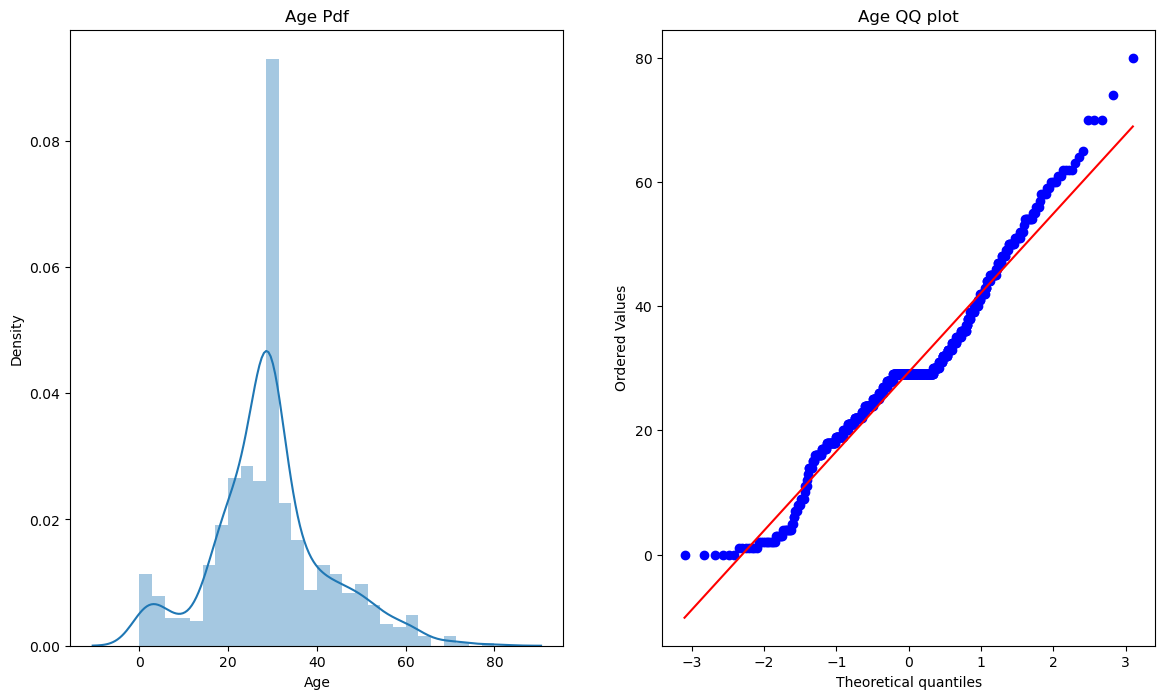

In [45]:
plt.figure(figsize=(14,8))
plt.subplot(121)
sns.distplot(x_train["Age"])
plt.show
plt.title("Age Pdf")

plt.subplot(122)
stats.probplot(x_train["Age"] , dist = "norm" ,  plot = plt)
plt.show
plt.title("Age QQ plot")

C:\Users\Hanif ullah laptop\AppData\Local\Temp\ipykernel_7972\1902851321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Fare"])


Text(0.5, 1.0, ' QQ plot')

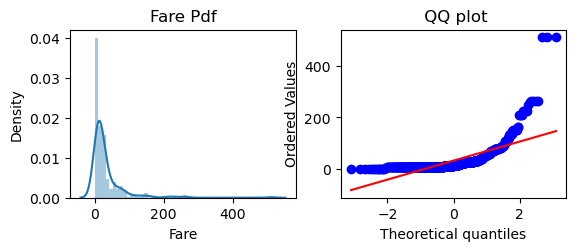

In [46]:
plt.subplot(223)
sns.distplot(x_train["Fare"])
plt.show
plt.title("Fare Pdf")

plt.subplot(224)
stats.probplot(x_train["Fare"] , dist = "norm" ,  plot = plt)
plt.show
plt.title(" QQ plot")

In [47]:
clf = LogisticRegression(max_iter=200)
clf2 = DecisionTreeClassifier()

In [48]:
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)

# Evaluate
print("LogReg accuracy:", accuracy_score(y_test, clf1.predict(x_test)))
print("DecisionTree accuracy:", accuracy_score(y_test, clf2.predict(x_test)))

LogReg accuracy: 0.6480446927374302
DecisionTree accuracy: 0.6424581005586593


In [49]:
clf3 = FunctionTransformer(np.log1p)

In [54]:
x_train_transformed = clf3.fit_transform(x_train)
x_test_transformed = clf3.fit_transform(x_test)

In [55]:
clf1.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

# Evaluate
print("LogReg accuracy:", accuracy_score(y_test, clf1.predict(x_test_transformed)))
print("DecisionTree accuracy:", accuracy_score(y_test, clf2.predict(x_test_transformed)))

LogReg accuracy: 0.6815642458100558
DecisionTree accuracy: 0.6424581005586593


In [59]:
x_transformed = clf3.fit_transform(x)
clf = LogisticRegression(max_iter=200)
clf2 = DecisionTreeClassifier()
print("LR", np.mean(cross_val_score(clf1,x_transformed,y, scoring="accuracy", cv=10 )))
print("DT", np.mean(cross_val_score(clf2,x_transformed,y, scoring="accuracy", cv=10 )))

LR 0.6791510611735331
DT 0.6656054931335831


In [43]:
C

NameError: name 'LogisticRegression' is not defined